<a href="https://colab.research.google.com/github/SilvaAMKI/RepositoryIS/blob/main/heart_disease_prediction_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_heart.csv to dataset_heart (1).csv
User uploaded file "dataset_heart (1).csv" with length 10244 bytes


In [ ]:
file = pd.read_csv('dataset_heart.csv')

In [ ]:
file.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [ ]:
X_train = file

In [ ]:
X_new_train = X_train.drop('heart disease', axis = 1)
Y_train = file['heart disease']
X_new_train.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [ ]:
print(file.shape)

(270, 14)


In [ ]:
Y_train.head()

0    2
1    1
2    2
3    1
4    1
Name: heart disease, dtype: int64

In [ ]:
print(X_new_train.shape, Y_train.shape)

(270, 13) (270,)


In [ ]:
df = dataset[~dataset.isin(['?'])]

In [ ]:
df = df.dropna(axis=0)

In [ ]:
print (df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


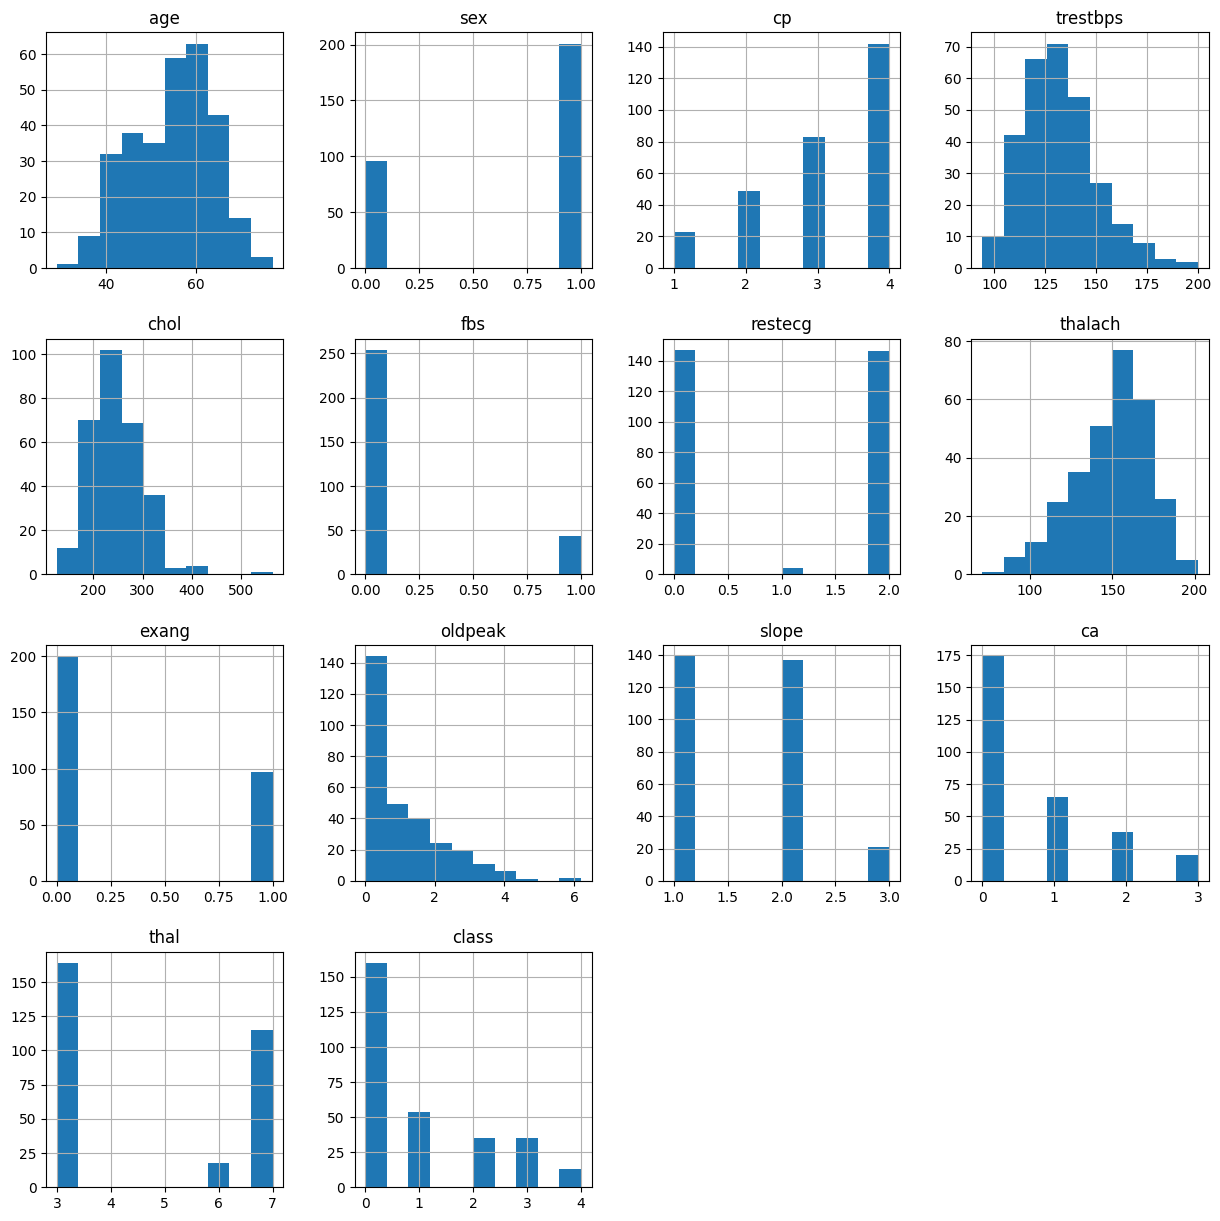

In [ ]:
data = df.apply(pd.to_numeric)
print(data.dtypes)
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()

In [ ]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [ ]:
data["class"] = np.where(data["class"] > 0, 1, data["class"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
pred = np.round(model.predict(X_test))
print(pred)

for i in pred:
    if(np.max(i) > 0.5):
        print("Have Heart Disease")
    else:
        print("Does not have heart disease")


print('Classification Accuracy: '+str(accuracy_score(y_test, pred) * 100)+' %')

2/2 [==============================] - 0s 4ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]]
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Does not have heart disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Heart Disease
Have Hear

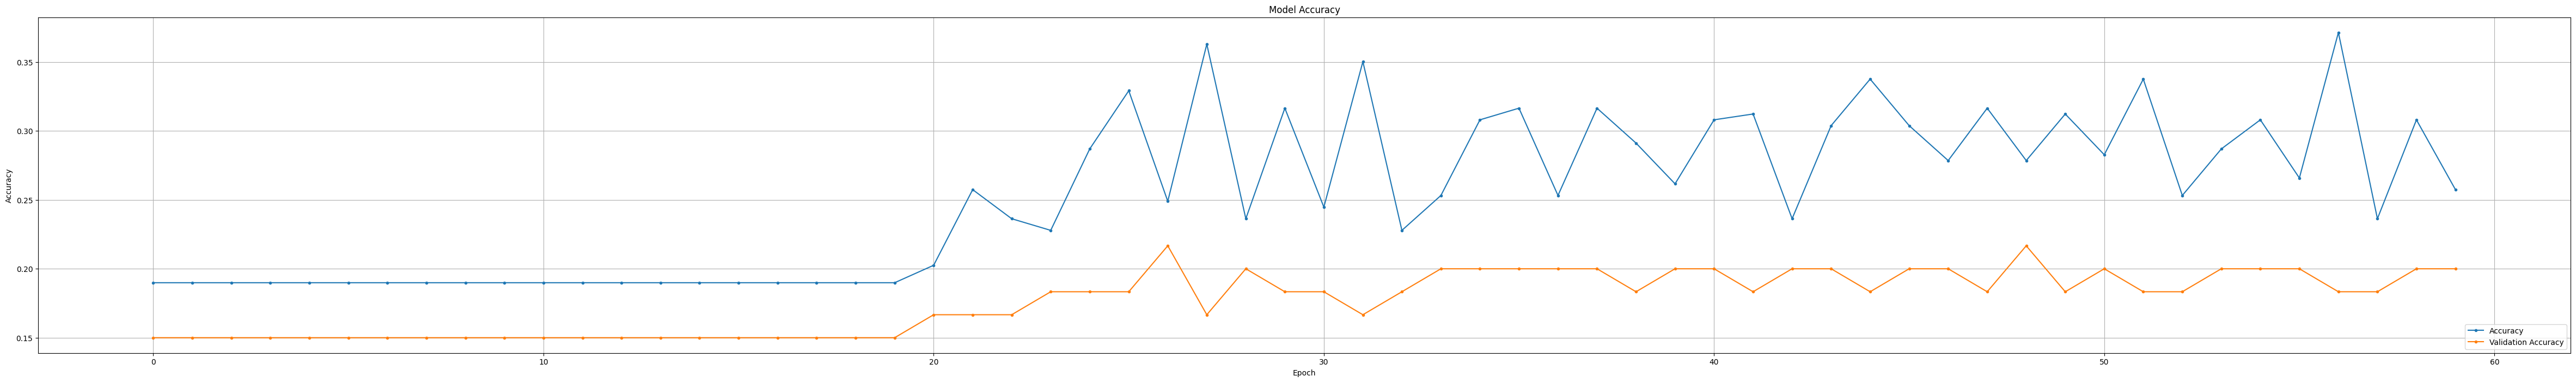

In [ ]:
plt.figure(figsize=(60, 8))
plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Accuracy', 'Validation Accuracy'], loc='lower right')
plt.savefig('model_accuracy_binary.png')
plt.show()

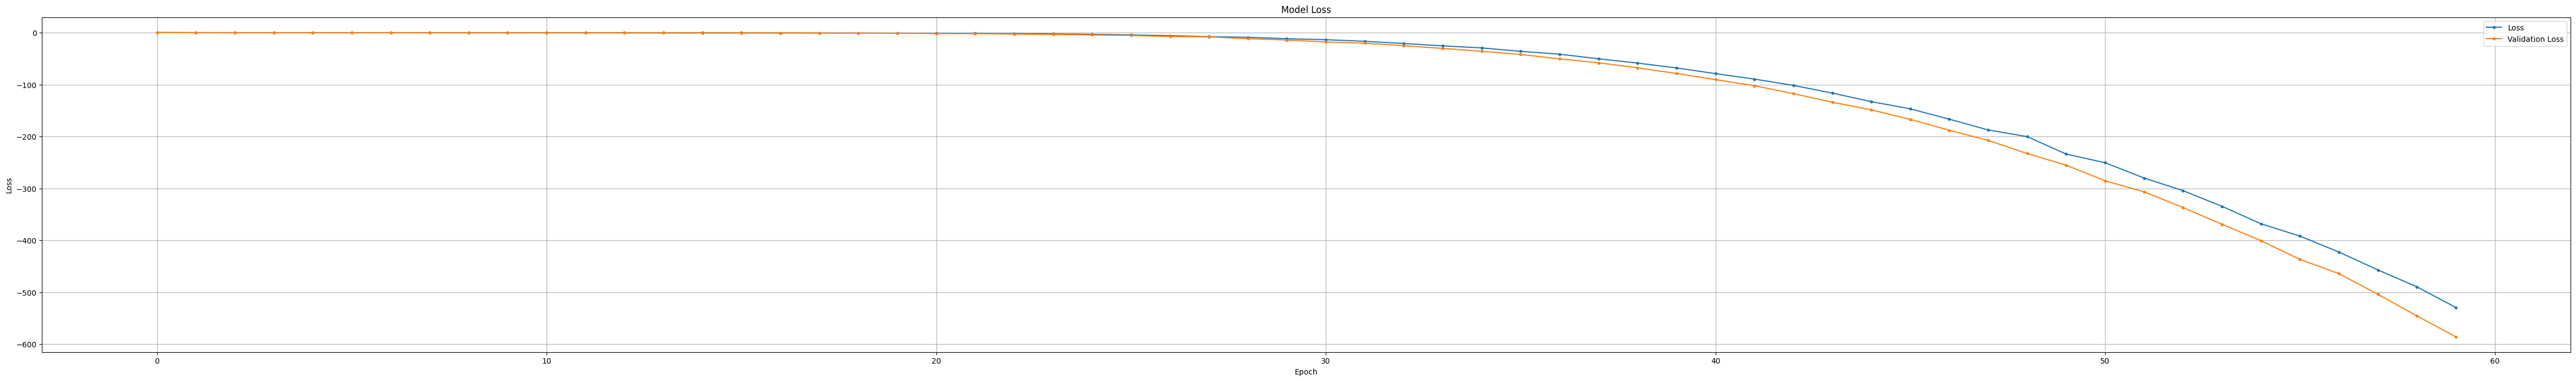

In [ ]:
plt.figure(figsize=(60, 8))
plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.savefig('model_loss_binary.png')
plt.show()